<a href="https://colab.research.google.com/github/js3l2/Buffalo-NY-Crime-Rates/blob/main/BuffaloCrimeRates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

### Api call with limit 1220

In [ ]:
url="https://data.buffalony.gov/resource/xxu9-yrhd.csv?$limit=1220"
df = pd.read_csv(url)
df.dropna(axis=1, thresh=1)

,type,count,month,year,date
0,Homicide,8,Jun,2022,2022-06-01T00:00:00.000
1,Rape,9,Jun,2022,2022-06-01T00:00:00.000
2,Robbery,37,Jun,2022,2022-06-01T00:00:00.000
3,Assault,150,Jun,2022,2022-06-01T00:00:00.000
4,Burglary,118,Jun,2022,2022-06-01T00:00:00.000
...,...,...,...,...,...
1213,Larceny,744,January,2008,2008-01-01T00:00:00.000
1214,Rape,23,January,2008,2008-01-01T00:00:00.000
1215,Homicide,2,January,2008,2008-01-01T00:00:00.000
1216,Burglary,313,January,2008,2008-01-01T00:00:00.000


### Sorting of Crimes per date and printing first and last five rows


In [ ]:
CrimeRatesSorted = df.sort_values(by=["date"],ascending=True)

CrimeRatesSorted.head()

,type,count,month,year,date
1217,Robbery,135,January,2008,2008-01-01T00:00:00.000
1211,Assault,136,January,2008,2008-01-01T00:00:00.000
1212,Motor Vehicle Theft,200,January,2008,2008-01-01T00:00:00.000
1216,Burglary,313,January,2008,2008-01-01T00:00:00.000
1214,Rape,23,January,2008,2008-01-01T00:00:00.000


In [ ]:
CrimeRatesSorted.tail()

,type,count,month,year,date
4,Burglary,118,Jun,2022,2022-06-01T00:00:00.000
3,Assault,150,Jun,2022,2022-06-01T00:00:00.000
2,Robbery,37,Jun,2022,2022-06-01T00:00:00.000
1,Rape,9,Jun,2022,2022-06-01T00:00:00.000
0,Homicide,8,Jun,2022,2022-06-01T00:00:00.000


In [ ]:
YearTotal = CrimeRatesSorted.groupby("year").sum()

### Visualizing Crime Rates Per Year

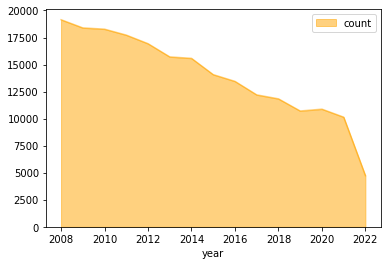

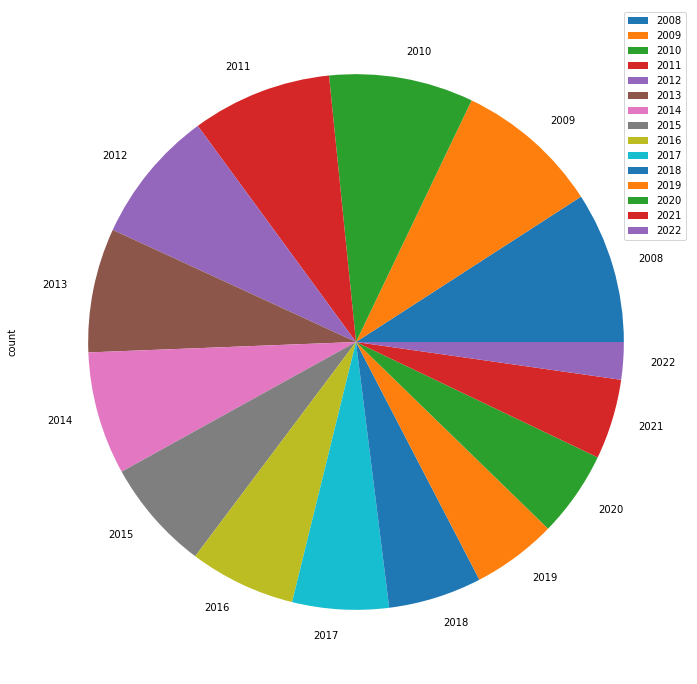

In [ ]:
YearTotal.plot.area(stacked=False,color="orange")
YearTotal.plot.pie(subplots=True, figsize=(12, 13))
plt.show()

### Visualizing Crime Drop Rates

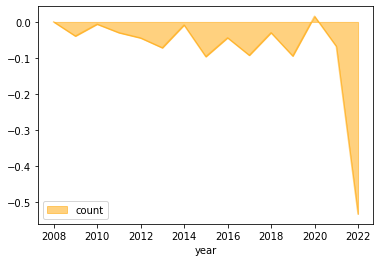

In [ ]:
YearTotal.pct_change().plot.area(stacked=False,color="orange")
plt.show()

### Grouping Crimes By Type

In [ ]:
CrimeType = df.groupby("type").sum()
del CrimeType["year"]
TopCrime = CrimeType.sort_values(by=["count"],ascending=False)

### Visualising Top Crimes 

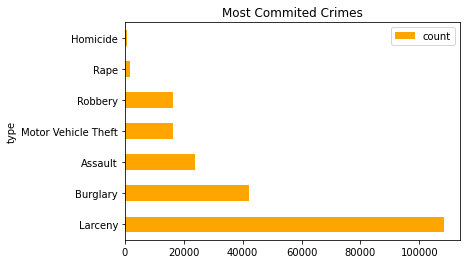

In [ ]:
TopCrime.plot(kind="barh",title="Most Commited Crimes",color="orange")
plt.show()

### Exporting the Top 3 Months of Crimes and Visualising 

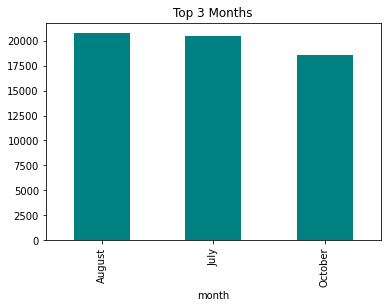

In [ ]:
TopMonths = df.groupby("month").sum().sort_values(by=["count"],ascending=False)
del TopMonths["year"]
TopMonths.head(3).plot(kind="bar",title="Top 3 Months",color="teal",legend=False)
plt.show()

### Importing the data in a sqlite3 database

In [ ]:
conn=sqlite3.connect('Buffalo Crime Rates.db')
YearTotal.to_sql(name="Total Crimes Per Year", con=conn, if_exists="replace")
TopCrime.to_sql(name="Most Commited Crimes", con=conn, if_exists="replace")
TopMonths.head(3).to_sql("Top Three Months",con=conn,if_exists="replace")

### Saving data to csv file

In [ ]:
YearTotal.to_csv("Total Crimes.csv")
TopCrime.to_csv("Most Commited Crimes.csv")
TopMonths.head(3).to_csv("Top Three Months.csv") 